#1. Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls -al '/gdrive/My Drive/Colab Notebooks/자율주행_스터디/Chap2_데이터분석기초/data'

total 2171732
-rw------- 1 root root    337847 May 20 08:04 data_202001.csv
-rw------- 1 root root    314682 May 20 08:00 data_202002.csv
-rw------- 1 root root    335953 May 20 07:59 data_202003.csv
-rw------- 1 root root    988308 May 20 08:10 data_2020.csv
-rw------- 1 root root 783889122 May 20 05:49 TCS_%EC%98%81%EC%97%85%EC%86%8C%EA%B0%84%ED%86%B5%ED%96%89%EC%8B%9C%EA%B0%84_1%EC%8B%9C%EA%B0%84_1%EA%B0%9C%EC%9B%94_202001
-rw------- 1 root root 699429059 May 20 05:49 TCS_%EC%98%81%EC%97%85%EC%86%8C%EA%B0%84%ED%86%B5%ED%96%89%EC%8B%9C%EA%B0%84_1%EC%8B%9C%EA%B0%84_1%EA%B0%9C%EC%9B%94_202002
-rw------- 1 root root 738556069 May 20 05:49 TCS_%EC%98%81%EC%97%85%EC%86%8C%EA%B0%84%ED%86%B5%ED%96%89%EC%8B%9C%EA%B0%84_1%EC%8B%9C%EA%B0%84_1%EA%B0%9C%EC%9B%94_202003


#2. Korean Characters

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,570 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rc('font', family='NanumBarunGothic')

#3. Load Data

In [3]:
import pandas as pd

In [4]:
file = '/gdrive/My Drive/Colab Notebooks/자율주행_스터디/Chap2_데이터분석기초/data/data_2020.csv'
data = pd.read_csv(file)

#4. 집계시

In [5]:
data_06_22 = data[data.집계시.isin(range(6,23))]

In [ ]:
data_06_22.sort_values(by='집계시')

In [7]:
data_06_22_counting = data_06_22['집계시'].value_counts()

In [11]:
data_06_22_counting

14    1766
12    1758
15    1755
13    1754
11    1744
10    1725
16    1724
17    1719
9     1703
18    1666
8     1662
19    1628
20    1611
7     1585
21    1559
22    1505
6     1440
Name: 집계시, dtype: int64

In [9]:
data_06_22_counting_sorted = data_06_22_counting.sort_index()

In [10]:
data_06_22_counting_sorted

6     1440
7     1585
8     1662
9     1703
10    1725
11    1744
12    1758
13    1754
14    1766
15    1755
16    1724
17    1719
18    1666
19    1628
20    1611
21    1559
22    1505
Name: 집계시, dtype: int64

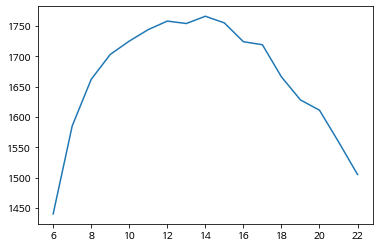

In [14]:
plt.plot(data_06_22_counting_sorted.index, data_06_22_counting_sorted.values)

In [15]:
x = data_06_22_counting_sorted.index

In [16]:
labels = [str(i) + '시' for i in x]

In [17]:
labels

['6시',
 '7시',
 '8시',
 '9시',
 '10시',
 '11시',
 '12시',
 '13시',
 '14시',
 '15시',
 '16시',
 '17시',
 '18시',
 '19시',
 '20시',
 '21시',
 '22시']

In [18]:
values = data_06_22_counting_sorted.values

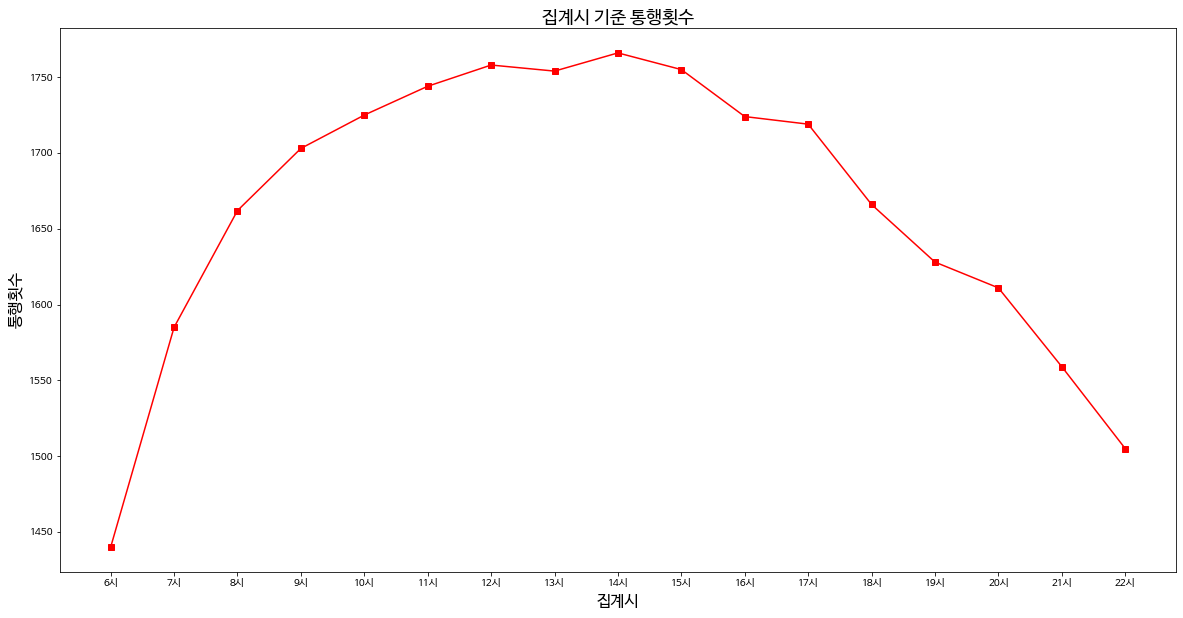

In [19]:
plt.figure(figsize=(20,10))
plt.plot(labels, values, marker='s', color='r')
plt.title('집계시 기준 통행횟수', fontsize=18)
plt.xlabel('집계시', fontdict={'size':16})
plt.ylabel('통행횟수', fontdict={'size':16})
plt.show()

#5. 도착영업소코드

In [20]:
data_destination_counting = data['도착영업소코드'].value_counts()

In [21]:
data_destination_counting

105    12274
110     9419
115     6509
140     2235
130     1972
135     1759
125     1677
120     1511
Name: 도착영업소코드, dtype: int64

In [22]:
data_destination_counting_sorted = data_destination_counting.sort_index()

In [23]:
data_destination_counting_sorted

105    12274
110     9419
115     6509
120     1511
125     1677
130     1972
135     1759
140     2235
Name: 도착영업소코드, dtype: int64

In [24]:
x = data_destination_counting_sorted.index

In [25]:
labels = [str(i) for i in x]

In [26]:
labels

['105', '110', '115', '120', '125', '130', '135', '140']

In [27]:
labels = ['기흥', '목천', '대전', '부산', '동김천', '경주', '남구미', '황간']

In [28]:
values = data_destination_counting_sorted.values

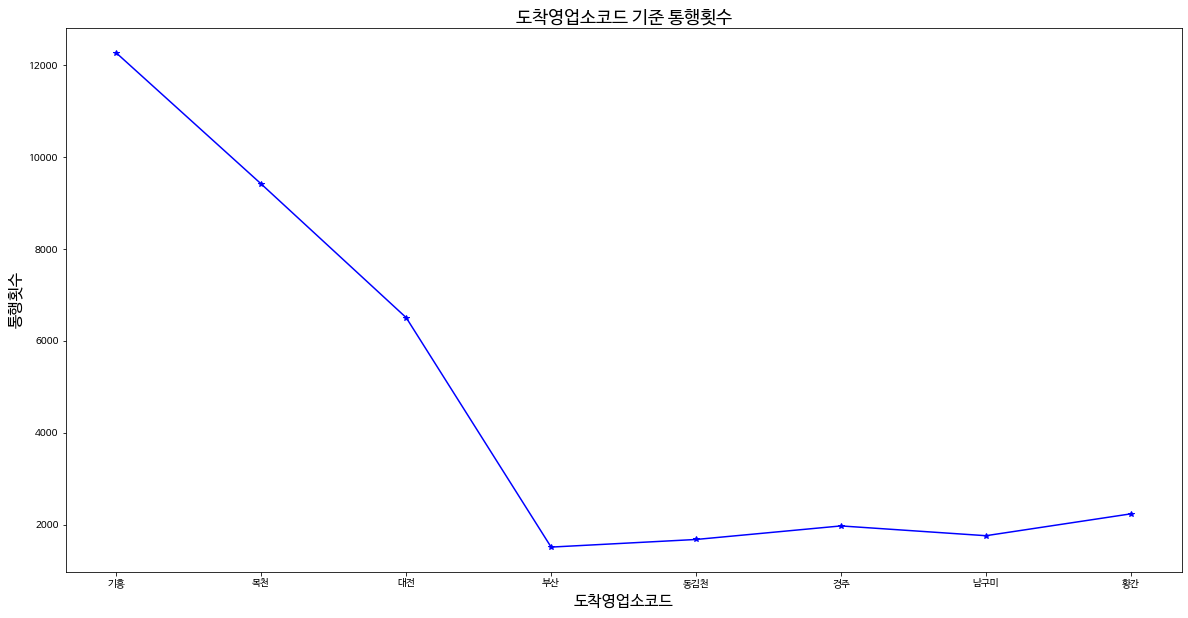

In [29]:
plt.figure(figsize=(20,10))
plt.plot(labels, values, marker='*', color='b')
plt.title('도착영업소코드 기준 통행횟수', fontsize=18)
plt.xlabel('도착영업소코드', fontdict={'size':16})
plt.ylabel('통행횟수', fontdict={'size':16})
plt.show()

#6. 요일

In [30]:
data_weekdays = data.groupby(by=['요일']).mean()

In [31]:
data_weekdays

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간
요일,,,,,
0,2.020022e+07,11.734950,101.0,114.529922,4813.112783
1,2.020022e+07,11.691664,101.0,113.743022,4612.857648
2,2.020021e+07,11.902394,101.0,113.841621,4774.242357
3,2.020021e+07,11.929709,101.0,114.103057,4918.862530
4,2.020021e+07,11.923865,101.0,114.440886,5264.959004
5,2.020022e+07,11.463546,101.0,114.764006,5137.932272
6,2.020022e+07,12.400000,101.0,115.002099,4823.627282


In [32]:
data_weekdays_time = data_weekdays['통행시간']

In [33]:
data_weekdays_time

요일
0    4813.112783
1    4612.857648
2    4774.242357
3    4918.862530
4    5264.959004
5    5137.932272
6    4823.627282
Name: 통행시간, dtype: float64

In [34]:
x = data_weekdays_time.index

In [35]:
labels = ['월', '화', '수', '목', '금', '토', '일']

In [36]:
values = data_weekdays_time.values

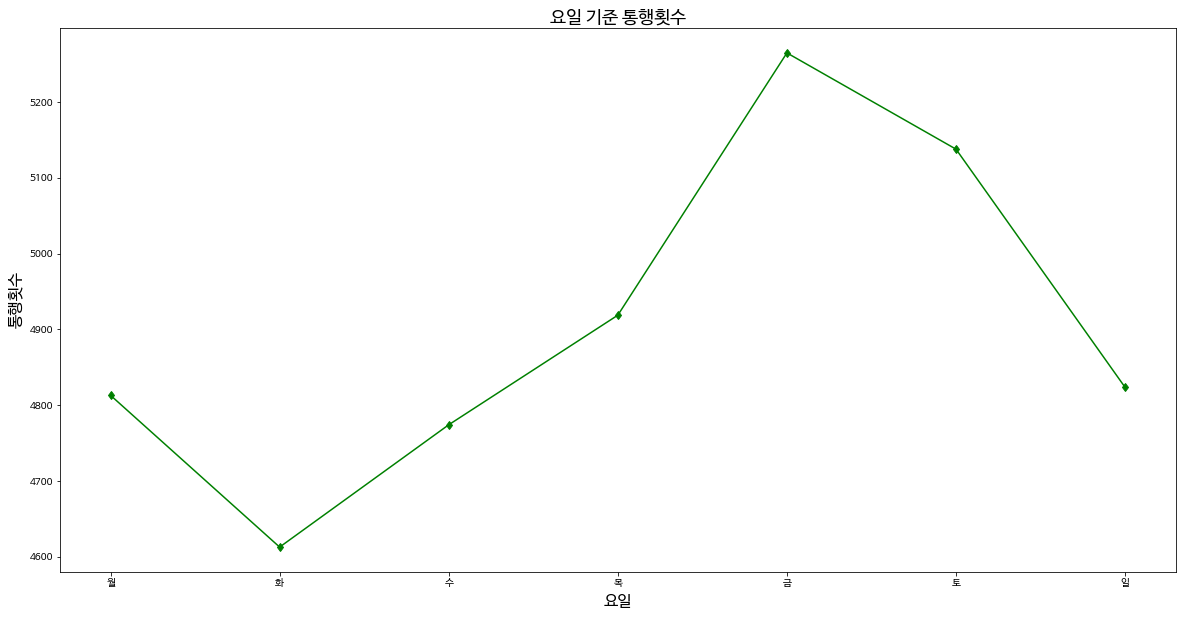

In [38]:
plt.figure(figsize=(20,10))
plt.plot(labels, values, marker='d', color='g')
plt.title('요일 기준 통행횟수', fontsize=18)
plt.xlabel('요일', fontdict={'size':16})
plt.ylabel('통행횟수', fontdict={'size':16})
plt.show()